In [1]:
import os
import pandas as pd
import numpy as np
import ast

### Read Data

In [2]:
data = pd.read_csv("data.csv", sep=";", index_col = "Unnamed: 0")

In [3]:
def safe_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return val

songs = data["normalized chords"].apply(safe_eval)
parsed_songs = data["normalized and parsed chords"].apply(safe_eval)
name = data["song"]

### Assemble bigrams

In [4]:
def makebigrams(song):
    bigrams = []
    for i, chord in enumerate(song):
        if i == 0:
            bigrams.append(("Start", chord))
            bigrams.append((chord, song[i + 1]))
        elif i != 0 and i != (len(song) - 1):
            bigrams.append((chord, song[i + 1]))
        else:
            bigrams.append((chord, "End"))
    
    return bigrams

In [5]:
bgcorpus = [makebigrams(song) for song in songs]
bgdict = {song: bgcorpus[i] for i, song in enumerate(name)}

### Unweighted bigrams

In [7]:
# Defining the function to get precision, recall and f1
def getmetrics1(reference, predicted):
    
    tp = 0
    fn = 0
    for bigram in reference:
        if bigram in predicted:
            tp += 1
        else:
            fn += 1
    
    fp = 0
    for bigram in predicted:
        if bigram not in reference:
            fp += 1
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return [precision, recall, f1]

In [9]:
matrix_u = pd.DataFrame(index = name, columns = name)

for name_x, reference in bgdict.items():
    for name_y, predicted in bgdict.items():
        matrix_u.at[name_y, name_x] = getmetrics1(reference, predicted)[2]

In [10]:
matrix_u.head()

song,9.20 Special,26-2,52nd Street Theme,500 Miles High,502 Blues,A Ballad,A Beautiful Friendship,A Blossom Fell,A Certain Smile,A Child Is Born,...,You're My Thrill,You're Nobody Till Somebody Loves You,You're The Top,You've Changed,Young And Foolish,Young At Heart,Zhivago,Zing Went The Strings Of My Heart,Zingaro (Retrato Em Branco E Preto),Zoltan
song,,,,,,,,,,,,,,,,,,,,,
9.20 Special,1.0,0,0.163265,0,0,0,0.048193,0.070588,0.093023,0,...,0.060606,0.070588,0.04878,0.104167,0.021505,0.078431,0.012121,0.122807,0,0
26-2,0,1.0,0.15,0,0.021053,0.155963,0.269663,0.118812,0.336842,0.090909,...,0,0.14433,0.248175,0.24,0.366972,0.201681,0,0.244275,0.020619,0
52nd Street Theme,0.196078,0.037736,1.0,0,0,0.08867,0.093023,0.134831,0.214286,0,...,0,0.113636,0.152672,0.0625,0.153846,0.227273,0,0.278261,0,0
500 Miles High,0,0,0,1.0,0.076923,0,0,0,0,0.027778,...,0.021978,0.075,0.017094,0,0.022727,0.041237,0,0.166667,0.075949,0
502 Blues,0,0.021053,0,0.052632,1.0,0.063158,0,0,0.026667,0.063492,...,0,0,0.017699,0,0,0,0,0,0.054054,0


In [11]:
matrix_u.to_csv("f1_matrix.csv")

In [12]:
regularity = {}

for n in name:
    regularity[n] = sum(list(matrix_u[n]))

In [13]:
# Least unique songs
dict(sorted(regularity.items(), key=lambda item: item[1], reverse=True))

{'Billy Boy': 482.8332967516555,
 'My Little Suede Shoes': 456.4796955693666,
 'Way You Look Tonight, The': 444.0772557719407,
 'For Sentimental Reasons': 442.8072430058574,
 'Jeepers Creepers': 430.92866583124066,
 'Bellarosa': 427.707162483222,
 'Things We Did Last Summer, The': 425.4754211876845,
 "Sometimes I'm Happy": 424.73144920955156,
 'Eclypso': 423.6481355559201,
 'Just One More Chance': 423.0981924621788,
 'I Get Along Without You': 421.5825056334776,
 'Mambo Inn': 421.2544791030089,
 'In Love In Vain': 420.76434263018933,
 "It's Only a Paper Moon": 418.38885679813154,
 'Look To The Rainbow': 418.38491109418493,
 'I Like The Likes Of You': 418.3668317396483,
 'Masquerade Is Over, The': 418.3649404236518,
 'Heart And Soul': 417.24096667316746,
 'Too Young To Go Steady': 414.6098473728554,
 "I've Never Been In Love Before": 413.87908097747203,
 'Lady is a Tramp, The': 410.26124340485615,
 "I Guess I'll Hang My Tears Out To Dry": 408.11482095586064,
 'One Morning In May': 405.9

In [14]:
# Most unique songs
dict(sorted(regularity.items(), key=lambda item: item[1], reverse=False))

{'Terra Nova': 1.0567711962833914,
 'Fall': 1.0666851903306473,
 'Dienda': 1.094628731682776,
 'Backward Step, The': 1.1055102545095132,
 'Nicolette': 1.1189461749612126,
 'Toy Tune': 1.1255884498343502,
 'Ma Belle Hélène': 1.1330815571208332,
 'Maiden Voyage': 1.1451612903225805,
 'Punjab': 1.2769894701120028,
 'Re: Person I Knew': 1.2981534371487613,
 'Mr. Day': 1.3580174341916613,
 'Watermelon Man': 1.438343828222293,
 'Big Push, The': 1.530357317375994,
 'Minority': 1.5315598913800401,
 'In Pursuit Of The 27th Man': 1.5597056290436422,
 'Limbo': 1.5878059488877994,
 "My Man's Gone Now": 1.6231539927314418,
 'Leaving': 1.6382547437212072,
 'Hindsight': 1.7893209173424318,
 'Time Remembered': 1.9266278098895384,
 'Señor Blues': 1.9404206873259575,
 'Pinocchio': 1.9765689482503699,
 'Summer Band Camp': 2.0059019291763036,
 'Unrequited': 2.258559578563637,
 'Passion Flower': 2.5024284709255156,
 'African Queen, The': 2.6395171432138897,
 "Duke Ellington's Sound Of Love": 2.848352069186

### Unweighted Bigrams 2.0

In [8]:
# Calculating bigram counts

def countbg(song):
    bgcounts = {}
    for change in song:
        if change not in bgcounts.keys():
            bgcounts[change] = 1
        else:
            bgcounts[change] += 1
    
    return bgcounts

bgcounts = [countbg(song) for song in bgcorpus]

In [ ]:
countsdict = {song: bgcounts[i] for i, song in enumerate(name)}

In [9]:
# Defining the function to get precision, recall and f1
def getmetrics2(reference, predicted):
    
    tp = 0
    fp = 0
    fn = 0
    for bigram in reference.keys():
        if bigram in predicted.keys():
            if reference[bigram] <= predicted[bigram]:
                tp += reference[bigram]
                fp += predicted[bigram] - reference[bigram]
            else:
                tp += predicted[bigram]
                fn += reference[bigram] - predicted[bigram]
        else:
            fn += reference[bigram]
    
    for bigram in predicted.keys():
        if bigram not in reference.keys():
            fp += predicted[bigram]
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return [precision, recall, f1, tp, fp, fn]

In [10]:
test1 = {('Start', 'A'): 1, ('A', 'B'): 7, ('B', 'C'): 2, ('C', 'End'): 1, ('C', 'F'): 1}
test2 = {('Start', 'A'): 1, ('A', 'B'): 3, ('B', 'C'): 2, ('C', 'End'): 1, ('F', 'G'): 1}
getmetrics2(test1, test2)
# These scores check out :)

[0.875, 0.5833333333333334, 0.7000000000000001, 7, 1, 5]

In [19]:
matrix2 = pd.DataFrame(index = name, columns = name)

for name_x, reference in countsdict.items():
    for name_y, predicted in countsdict.items():
        matrix2.at[name_y, name_x] = getmetrics2(reference, predicted)[2]

In [20]:
matrix2.head()

song,9.20 Special,26-2,52nd Street Theme,500 Miles High,502 Blues,A Ballad,A Beautiful Friendship,A Blossom Fell,A Certain Smile,A Child Is Born,...,You're My Thrill,You're Nobody Till Somebody Loves You,You're The Top,You've Changed,Young And Foolish,Young At Heart,Zhivago,Zing Went The Strings Of My Heart,Zingaro (Retrato Em Branco E Preto),Zoltan
song,,,,,,,,,,,,,,,,,,,,,
9.20 Special,1.0,0,0.16,0,0,0,0.047619,0.047619,0.070588,0,...,0.040816,0.047619,0.04878,0.06383,0.021277,0.078431,0.012121,0.072072,0,0
26-2,0,1.0,0.035398,0,0.021053,0.067308,0.185567,0.041237,0.22449,0.066667,...,0,0.082474,0.132353,0.205607,0.261682,0.086957,0,0.129032,0.020619,0
52nd Street Theme,0.16,0.035398,1.0,0,0,0.08867,0.086957,0.130435,0.193548,0,...,0,0.108696,0.152672,0.058824,0.137255,0.181818,0,0.218487,0,0
500 Miles High,0,0,0,1.0,0.051948,0,0,0,0,0.027778,...,0.021505,0.050633,0.016949,0,0.022472,0.041237,0,0.132075,0.075949,0
502 Blues,0,0.021053,0,0.051948,1.0,0.010811,0,0,0.026667,0.059701,...,0,0,0.017699,0,0,0,0,0,0.054054,0


In [20]:
matrix2.to_csv("f1_matrix2.csv")

### Regularity

In [24]:
regularity = {}

for n in name:
    regularity[n] = sum(list(matrix2[n]))
    
# Least unique songs
dict(sorted(regularity.items(), key=lambda item: item[1], reverse=True))

{'If There Is Someone Lovelier': 275.5674498368432,
 'Why Do I Love You?': 273.79690238161646,
 'One Morning In May': 273.0034621200598,
 'Look For The Silver Lining': 268.96748879150186,
 'I Want To Be Happy': 268.4852720397937,
 'Try A Little Tenderness': 268.2817710296257,
 'Things We Did Last Summer, The': 255.16268052690089,
 'In Love In Vain': 254.46044397535792,
 'Oh, Lady Be Good': 254.10114013305187,
 "I've Never Been In Love Before": 253.06656368873996,
 'Moonlight Becomes You': 252.38951938547123,
 "Party's Over, The": 251.11719139686656,
 'I May Be Wrong': 249.9097008980595,
 'Misty': 247.25522941000364,
 "Rockin' Chair": 246.7904975450566,
 "This Year's Kisses": 246.3122547218875,
 "I'm Glad There Is You": 245.5435514295847,
 'Lady is a Tramp, The': 244.18637281410065,
 'I Like The Likes Of You': 243.36467693418223,
 'Dexterity': 243.15077839412612,
 'My Shining Hour': 242.66285023287963,
 'For Sentimental Reasons': 241.2531416917225,
 'Manhattan': 240.77079669732922,
 'Ha

In [17]:
# Most unique songs
dict(sorted(regularity.items(), key=lambda item: item[1], reverse=False))

{'Maiden Voyage': 1.0172413793103448,
 'Terra Nova': 1.0567711962833914,
 'Fall': 1.0655913978494624,
 'Toy Tune': 1.0713595400336537,
 'Dienda': 1.081296607612397,
 'Backward Step, The': 1.1035251897585916,
 'Nicolette': 1.1189461749612126,
 'Ma Belle Hélène': 1.130778697948857,
 'Mr. Day': 1.2254177606806294,
 'Big Push, The': 1.2383450373335025,
 'Watermelon Man': 1.2760949268871156,
 'Punjab': 1.2761634761388563,
 'Re: Person I Knew': 1.2978798393375437,
 'Minority': 1.5300864698698373,
 'In Pursuit Of The 27th Man': 1.540193790275517,
 'Hindsight': 1.556246561677625,
 'Limbo': 1.5847994700891188,
 "My Man's Gone Now": 1.5913795556064432,
 'Leaving': 1.6380259631218022,
 'Señor Blues': 1.7498752081945412,
 'Pinocchio': 1.8378971125226424,
 'Time Remembered': 1.8569651889371512,
 'Caribbean Fire Dance': 1.9328518806537807,
 'Summer Band Camp': 1.9660806471871002,
 'Unrequited': 1.9726483858311687,
 "Benny's Tune": 1.9851212554262032,
 'Passion Flower': 2.1466366870076112,
 'Oliloqui

In [25]:
regularity["Au Privave"]

143.5486297601949

### (OLD) Weighted Bigrams

In [46]:
# Calculating bigram weights

wbgcorpus = []

for i, song_bg in enumerate(bgcounts):
    song = {}
    for change, w in song_bg.items():
        song[(change[0], change[1])] =  w/sum(bgcounts[0].values())
    
    wbgcorpus.append(song)

In [15]:
wbgdict = {}

for i, song in enumerate(name):
    wbgdict[song] = wbgcorpus[i]

In [26]:
# Defining the function to get weighted precision, recall and f1
def getwmetrics(reference, predicted):
    
    tp = 0
    fn = 0
    for bigram, weight in reference.items():
        if bigram in predicted:
            tp += 1 - abs(weight - predicted[bigram])
        else:
            fn += weight
    
    fp = 0
    for bigram, weight in predicted.items():
        if bigram not in reference:
            fp += weight
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return [precision, recall, f1]

In [27]:
getwmetrics(wbgcorpus[2], wbgcorpus[0])

[0.9104477611940298, 0.8883495145631068, 0.8992628992628993]

In [28]:
matrix_w = pd.DataFrame(index = name, columns = name)

for name_x, reference in wbgdict.items():
    for name_y, predicted in wbgdict.items():
        matrix_w.at[name_y, name_x] = getwmetrics(reference, predicted)[2]

In [29]:
matrix_w.head()

song,9.20 Special,26-2,52nd Street Theme,500 Miles High,502 Blues,A Ballad,A Beautiful Friendship,A Blossom Fell,A Certain Smile,A Child Is Born,...,You're My Thrill,You're Nobody Till Somebody Loves You,You're The Top,You've Changed,Young And Foolish,Young At Heart,Zhivago,Zing Went The Strings Of My Heart,Zingaro (Retrato Em Branco E Preto),Zoltan
song,,,,,,,,,,,,,,,,,,,,,
9.20 Special,1.0,0,0.899263,0,0,0,0.697318,0.532544,0.7,0,...,0.661818,0.532544,0.611296,0.676692,0.497238,0.745946,0.360784,0.72973,0,0
26-2,0,1.0,0.433333,0,0.497297,0.581818,0.915912,0.485549,0.927168,0.770115,...,0,0.760807,0.8352,0.891738,0.912102,0.785553,0,0.817006,0.491979,0
52nd Street Theme,0.899263,0.433333,1.0,0,0,0.33213,0.688,0.527607,0.715517,0,...,0,0.518519,0.623729,0.470588,0.677824,0.826531,0,0.807425,0,0
500 Miles High,0,0,0,1.0,0.716535,0,0,0,0,0.567901,...,0.497175,0.54878,0.439024,0,0.511364,0.497297,0,0.751381,0.715953,0
502 Blues,0,0.497297,0,0.716535,1.0,0.315385,0,0,0.557576,0.748936,...,0,0,0.453202,0,0,0,0,0,0.724409,0


In [20]:
matrix_w.to_csv("f1_matrix_w.csv")

In [21]:
uniqueness = {}

for n in name:
    uniqueness[n] = sum(list(matrix_w[n]))
    
# Least unique songs
dict(sorted(uniqueness.items(), key=lambda item: item[1], reverse=True))

{'Try A Little Tenderness': 311.7182095753992,
 'Why Do I Love You?': 296.38802171813586,
 'Look For The Silver Lining': 295.4395528787945,
 'I Want To Be Happy': 294.2887469674256,
 "Rockin' Chair": 293.74188474356066,
 'One Morning In May': 293.0728750401366,
 'Oh, Lady Be Good': 290.42765717715656,
 'If There Is Someone Lovelier': 289.9235558663935,
 "What'll I Do": 285.5947706740266,
 'I May Be Wrong': 282.697007136825,
 'In Love In Vain': 280.33139741060745,
 "I'll Close My Eyes": 277.95867295198053,
 'I Like The Likes Of You': 277.67291443212395,
 'Moonlight Becomes You': 277.2435341674029,
 'There Will Never Be Another You': 276.63285156537313,
 'Love Walked In': 274.82670420346585,
 'Things We Did Last Summer, The': 274.38937610819323,
 'Lady is a Tramp, The': 273.29433734918365,
 'Where Are You?': 272.9467543221196,
 'Masquerade Is Over, The': 269.9629129933835,
 'Misty': 269.4316390788669,
 'For Sentimental Reasons': 268.4973817738108,
 'September In The Rain': 268.0102212043

In [22]:
# most unique songs
dict(sorted(uniqueness.items(), key=lambda item: item[1], reverse=False))

{'Maiden Voyage': 1.0213603147835864,
 'Terra Nova': 1.0861059756291445,
 'Dienda': 1.0874528229502056,
 'Fall': 1.0930567041817985,
 'Toy Tune': 1.1303878196541164,
 'Nicolette': 1.148481422250605,
 'Ma Belle Hélène': 1.1903316969307935,
 'Mr. Day': 1.2421669031302325,
 'Backward Step, The': 1.3239565592682634,
 'Re: Person I Knew': 1.3991755051819166,
 'Watermelon Man': 1.4235651292827325,
 'Big Push, The': 1.4280031061873208,
 'Punjab': 1.5071499631493728,
 'Hindsight': 1.6239367763822772,
 'Pinocchio': 1.6813877806882238,
 "My Man's Gone Now": 1.8155642631588205,
 'Minority': 1.8214957740617228,
 'Limbo': 1.8798110262681316,
 'Leaving': 1.884822963027885,
 'Señor Blues': 2.104149278469548,
 'Caribbean Fire Dance': 2.1094419335002375,
 'In Pursuit Of The 27th Man': 2.181503866534521,
 'Unrequited': 2.2566454270597105,
 'Jackie-ing': 2.277023773765819,
 'Time Remembered': 2.2787455919378665,
 'Summer Band Camp': 2.395984697910795,
 'Oliloqui Valley': 2.4097134942929537,
 'Passion Dan

In [24]:
print(getmetrics(bgcorpus[0], bgcorpus[2]))
print(getwmetrics(wbgcorpus[0], wbgcorpus[2]))

[0.17857142857142858, 0.21739130434782608, 0.19607843137254902]
[0.5319767441860465, 0.3588235294117647, 0.4285714285714286]


#### Hierarchical Clustering

In [12]:
# Convert to condensed distance form
condensed = squareform(vectors.values, checks=False)

# Cache path
linkage_path = "linkage_Z.npy"

# Load or compute linkage matrix
if os.path.exists(linkage_path):
    print("Loading cached linkage matrix...")
    Z = np.load(linkage_path, allow_pickle=True)
else:
    print("Computing linkage matrix...")
    Z = linkage(condensed, method='ward')
    np.save(linkage_path, Z)
    print("Linkage matrix saved.")

Computing linkage matrix...
Linkage matrix saved.


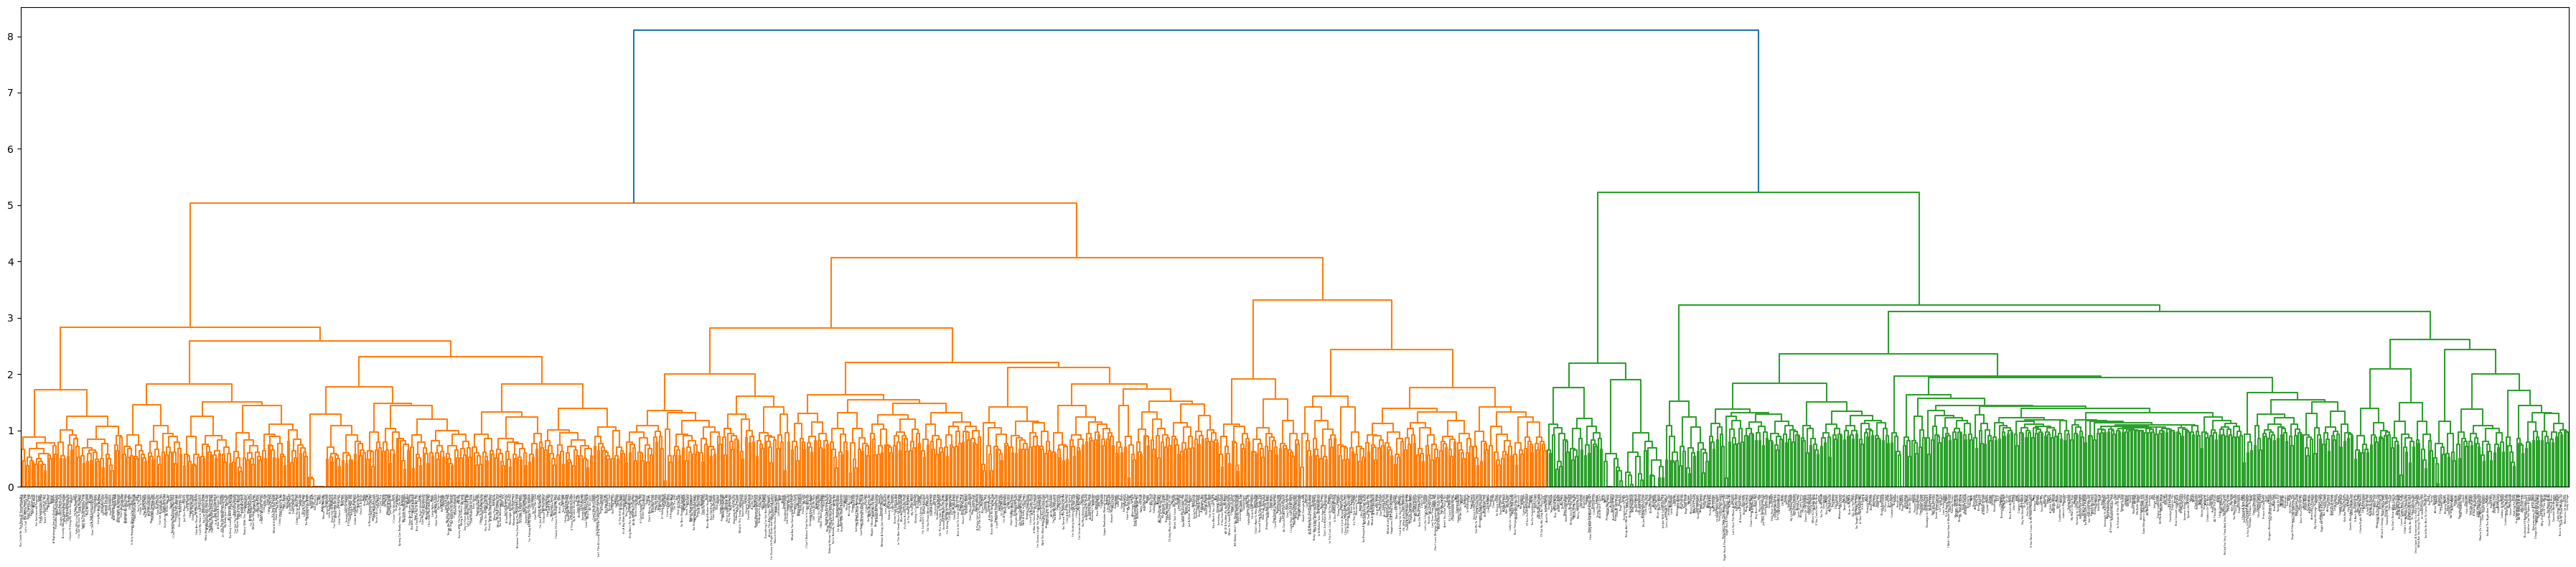

In [27]:
# Plot dendrogram
fig, ax = plt.subplots(figsize=(36, 8))
dendrogram(
    Z,
    labels=vectors.index.tolist(),
    leaf_rotation=90,
    leaf_font_size=2.5,
    ax=ax
)
fig.tight_layout()
plt.savefig("dendrogram1.png", dpi=600)
plt.show()
plt.close(fig)  # Free memory